In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
net = cv2.dnn.readNetFromDarknet('../weights/yolov3.cfg', '../weights/yolov3.weights')
output_names = net.getUnconnectedOutLayersNames()
LABELS = open('../weights/coco.names').read().strip().split("\n")

In [3]:
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_OPENCL)

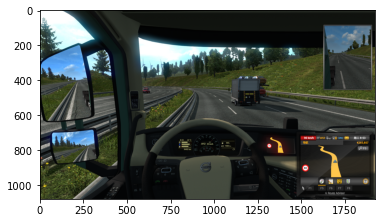

In [20]:
img = cv2.imread('../images/1591496970279.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H=img.shape[0]
W=img.shape[1]
plt.imshow(img)

In [5]:
blob = cv2.dnn.blobFromImage(img, 1.0/255, (320,320))
net.setInput(blob)

In [14]:
outs = net.forward(output_names)

In [44]:
outs[1].sum()

1730.9827

In [45]:
outs[2].sum()

5466.5493

In [15]:
# initialize our lists of detected bounding boxes, confidences, and
# class IDs, respectively
boxes = []
confidences = []
classIDs = []

In [48]:
# loop over each of the layer outputs
for output in outs:
    # loop over each of the detections
    for detection in output:
        # extract the class ID and confidence (i.e., probability) of
        # the current object detection
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        # filter out weak predictions by ensuring the detected
        # probability is greater than the minimum probability
        if confidence > 0.5:
            # scale the bounding box coordinates back relative to the
            # size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding
            # box followed by the boxes' width and height
            print(detection[0:4])
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")
            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            # update our list of bounding box coordinates, confidences,
            # and class IDs
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

[0.61762303 0.43136913 0.10878047 0.15709336]
[0.318617   0.42264813 0.0247599  0.03180827]


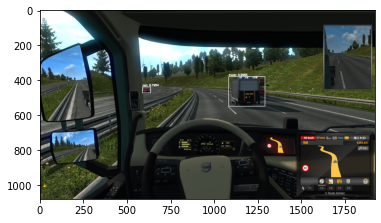

In [29]:
label_img = img.copy()
for i in range(len(classIDs)):
    # extract the bounding box coordinates
    (x, y) = (boxes[i][0], boxes[i][1])
    (w, h) = (boxes[i][2], boxes[i][3])
    # draw a bounding box rectangle and label on the image
    color = (255,255,255)
    cv2.rectangle(label_img, (x, y), (x + w, y + h), color, 2)
    text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
    cv2.putText(label_img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
        0.5, color, 2)
    
plt.imshow(label_img)

In [35]:
outs[2][100]

array([8.3896655e-01, 7.4592074e-03, 3.9994981e-02, 9.4177403e-02,
       3.2153277e-10, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e